# <center>Laboratorium 5<br>Metody Numeryczne</center>

Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi (w postaci kodu) z komentarzami w środowisku Jupyter Notebook i umieścić je na platformie e-learningowej.

***Materiały przygotowujące:***


In [1]:
import main
import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt

def PolyCoefficients(x, coeffs):
    """ Returns a polynomial for ``x`` values for the ``coeffs`` provided.
    The coefficients must be in ascending order (``x**0`` to ``x**o``).
    """
    o = len(coeffs)
    y = 0
    for i in range(o):
        y += coeffs[i]*x**i
    return y

***Zadanie 1.***  
Zaimplementuj interpolacje pierwszego stopnia. Jako dane wejściowe dane są dwa wektory: argumentów oraz wartości funkcji. Funkcja ma zwracać współczynniki funkcji liniowych w poszczególnych przedziałach.

***Podpowiedź***

poszczególne współczynniki przyjmują wartość:

$ a=\frac{y_{k+1}-y_k}{x_{k+1}-x_k}$

$ b=y-a*x_0$

***Przykład***


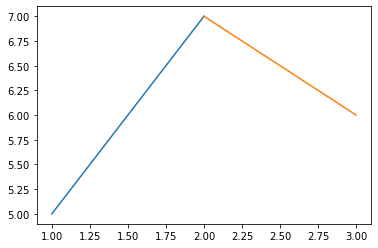

In [2]:
x=np.array([1,2,3])
y=np.array([5,7,6])

a,b=main.first_spline(x,y)
f = [[b[i],a[i]] for i in range(len(a))]

for i in range(len(x)-1):
    x_new = np.linspace(x[i], x[i+1],1000)
    plt.plot(x_new, PolyCoefficients(x_new, f[i]))

***Zadanie 2.***  
Korzystając z funkcji z pakietu [scipy.interpolate.splprep](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.splprep.html#scipy.interpolate.splprep), funkcji zaimplementowanej w Zadaniu 1 oraz interpolacji barycentrycznej z węzłami równoodległymi (korzystając z kodu z poprzedniego zadania) dokonaj interpolacji funkcji: 
    
### $ f(x) = \frac{1}{25x^2+1}$

W przedziale \[-1, 1\]

Dokonaj porównania wyników otrzymanych:  
Wykorzystując funkcję z ubiegłego tygodnia, ocenić jakość interpolacji funkcji spline pierwszego stopnia z wartościami danej funkcji.


C:\Users\nikos\anaconda3\lib\site-packages\scipy\interpolate\polyint.py:642: RuntimeWarning: divide by zero encountered in true_divide
  p = np.dot(c,self.yi)/np.sum(c,axis=-1)[...,np.newaxis]


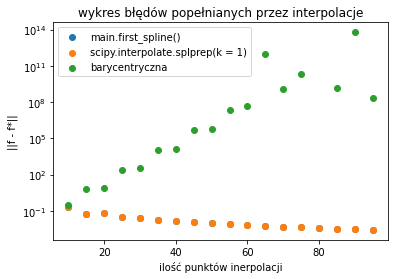

In [3]:
import baricentric as bar
from scipy.interpolate import splprep,barycentric_interpolate,splev

f4_base = lambda x,a: 1/(1+a*(x**2))
f4 = lambda x: f4_base(x,25)
x = np.linspace(-1,1,1000)
y = f4(x)

n = np.arange(10,100,5)

l_bar = np.zeros(len(n))
l_firstspl = np.zeros(len(n))
l_spl = np.zeros(len(n))
for i in n:
    xi = np.linspace(-1,1,i)
    yi=f4(xi)
    
    interpolated_f_bary = barycentric_interpolate(xi,yi,x)

    tck, u = splprep([xi , yi],s=0,k=1)
    t = np.linspace(u.min(),u.max(),1000)
    
    interpolated_f_splain = splev(t,tck,der = 0)

    a,b=main.first_spline(xi,yi)
    f = [[b[i],a[i]] for i in range(len(a))]
    first_spline_inte = np.array([yi[0]])
    for j in range(len(xi)-1):
        x_new = x[np.logical_and(xi[j]<x, x<=xi[j+1])]
        first_spline_inte = np.append(first_spline_inte,PolyCoefficients(x_new, f[j]))
    
    l_bar[np.where(n == i)] = bar.L_inf(y,interpolated_f_bary)
    l_spl[np.where(n == i)] = bar.L_inf(f4(interpolated_f_splain[0]),interpolated_f_splain[1])
    l_firstspl[np.where(n == i)] = bar.L_inf(y,first_spline_inte)
    
plt.figure()    
plt.scatter(n,l_firstspl, label="main.first_spline()")
plt.scatter(n,l_spl, label="scipy.interpolate.splprep(k = 1)")
plt.scatter(n,l_bar, label="barycentryczna")
plt.title("wykres błędów popełnianych przez interpolacje")
plt.yscale("log")
plt.xlabel("ilość punktów inerpolacji")
plt.ylabel("||f - f*||")
plt.legend()




PS niebieski wykres pokrywa się z pomarańczowym. z uwagi na taki sam sposób interpolacji(niestety nie w tych samych punktach)

***Zadanie 3.***  
Korzystając z funkcji z pakietu [scipy.interpolate.splprep](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.splprep.html#scipy.interpolate.splprep), funkcji zaimplementowanej w Zadaniu 1 oraz interpolacji barycentrycznej z węzłami równoodległymi (korzystając z kodu z poprzedniego zadania) dokonaj interpolacji funkcji: 
    
### $ f(x) = cos(x)x^4$

W przedziale \[-1, 1\]

Dokonaj porównania wyników otrzymanych:  
Wykorzystując funkcję z ubiegłego tygodnia, ocenić jakość interpolacji funkcji spline pierwszego stopnia z wartościami danej funkcji.


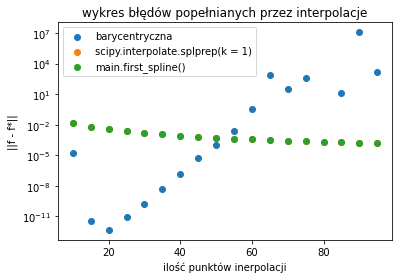

In [4]:

f4 = lambda x: np.cos(x)*x**4
x = np.linspace(-1,1,1000)
y = f4(x)

n = np.arange(10,100,5)

l_bar = np.zeros(len(n))
l_firstspl = np.zeros(len(n))
l_spl = np.zeros(len(n))
for i in n:
    xi = np.linspace(-1,1,i)
    yi=f4(xi)
    
    interpolated_f_bary = barycentric_interpolate(xi,yi,x)

    tck, u = splprep([xi , yi],s=0,k=1)
    t = np.linspace(u.min(),u.max(),1000)
    
    interpolated_f_splain = splev(t,tck,der = 0)

    a,b=main.first_spline(xi,yi)
    f = [[b[i],a[i]] for i in range(len(a))]
    first_spline_inte = np.array([yi[0]])
    for j in range(len(xi)-1):
        x_new = x[np.logical_and(xi[j]<x, x<=xi[j+1])]
        first_spline_inte = np.append(first_spline_inte,PolyCoefficients(x_new, f[j]))
    l_spl[np.where(n == i)] = bar.L_inf(f4(interpolated_f_splain[0]),interpolated_f_splain[1])
    l_bar[np.where(n == i)] = bar.L_inf(y,interpolated_f_bary)
    l_firstspl[np.where(n == i)] = bar.L_inf(y,first_spline_inte)
plt.figure()    
plt.scatter(n,l_bar, label="barycentryczna")
plt.scatter(n,l_spl, label="scipy.interpolate.splprep(k = 1)")
plt.scatter(n,l_firstspl, label="main.first_spline()")

plt.title("wykres błędów popełnianych przez interpolacje")
plt.yscale("log")
plt.xlabel("ilość punktów inerpolacji")
plt.ylabel("||f - f*||")
plt.legend()

PS zielony wykres pokrywa się z pomarańczowym. z uwagi na taki sam sposób interpolacji(niestety nie w tych samych punktach)

Text(0, 0.5, '|f(x)-f*(x)|')

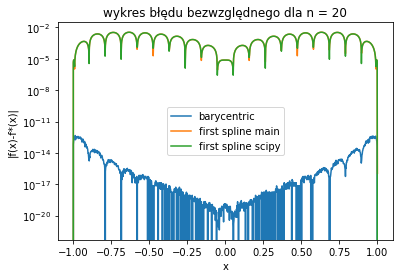

In [5]:

f4 = lambda x: np.cos(x)*x**4
x = np.linspace(-1,1,1000)
y = f4(x)


xi = np.linspace(-1,1,20)
yi=f4(xi)
    
interpolated_f_bary = barycentric_interpolate(xi,yi,x)

tck, u = splprep([xi , yi],s=0,k=1)
t = np.linspace(u.min(),u.max(),1000)
    
interpolated_f_splain = splev(t,tck,der = 0)

a,b=main.first_spline(xi,yi)
f = [[b[i],a[i]] for i in range(len(a))]
first_spline_inte = np.array([yi[0]])
for j in range(len(xi)-1):
    x_new = x[np.logical_and(xi[j]<x, x<=xi[j+1])]
    first_spline_inte = np.append(first_spline_inte,PolyCoefficients(x_new, f[j]))
plt.plot(x,abs(interpolated_f_bary-f4(x)),label= "barycentric")
plt.plot(x,abs(first_spline_inte - f4(x)), label="first spline main")
plt.plot(interpolated_f_splain[0],abs(interpolated_f_splain[1]-f4(interpolated_f_splain[0])),label="first spline scipy")

plt.yscale("log")
plt.legend()
plt.title("wykres błędu bezwzględnego dla n = 20")
plt.xlabel("x")
plt.ylabel("|f(x)-f*(x)|")

***Zadanie 4.***  
Zaimplementuj funkcję interpolującą sklejaną trzeciego rzędu (splajn kubiczny). Jako dane wejściowe dane są dwa wektory: argumentów oraz wartości funkcji. Funkcja ma zwracać współczynniki funkcji wielomianowych w poszczególnych przedziałach.

***Podpowiedź***

https://medium.com/eatpredlove/natural-cubic-splines-implementation-with-python-edf68feb57aa



***Zadania 5.***  
Korzystając z funkcji z pakietu [scipy.interpolate.splprep](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.splprep.html#scipy.interpolate.splprep), funkcji zaimplementowanej w Zadaniu 4: 
    
### $ f(x) = \frac{1}{25x^2+1}$

W przedziale \[-1, 1\]

Dokonaj porównania wyników otrzymanych:  
Wykorzystując funkcję z ubiegłego tygodnia, ocenić jakość interpolacji funkcji spline pierwszego stopnia z wartościami danej funkcji.


Text(0.5, 1.0, 'interpolacja n = 10')

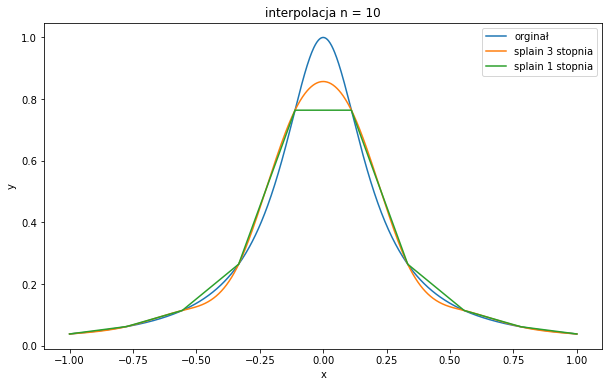

In [6]:
f4 =lambda x: 1/(1+25*(x**2))
x = np.linspace(-1,1,1000)
xi = np.linspace(-1,1,10)
yi=f4(xi)

a,b=main.first_spline(xi,yi)
f = [[b[i],a[i]] for i in range(len(a))]
interpolated_f_splain = np.array([yi[0]])
for j in range(len(xi)-1):
    x_new = x[np.logical_and(xi[j]<x, x<=xi[j+1])]
    interpolated_f_splain = np.append(interpolated_f_splain,PolyCoefficients(x_new, f[j]))

b,c,d=main.cubic_spline(xi,yi)
    #
f = [[d[i],c[i],b[i]] for i in range(len(b))]
cubic_spline_inte = np.array([yi[0]])
for j in range(len(xi)-1):
    x_new = x[np.logical_and(xi[j]<x, x<=xi[j+1])]
    y_new = yi[j]*np.ones(len(x_new))+f[j][2]*(x_new-xi[j])+f[j][1]*(x_new-xi[j])**2+f[j][0]*(x_new-xi[j])**3
    cubic_spline_inte = np.append(cubic_spline_inte,y_new)
plt.figure(figsize= [10,6])
plt.plot(x,f4(x), label = "orginał")
plt.plot(x,cubic_spline_inte, label = "splain 3 stopnia")
plt.plot(x,interpolated_f_splain, label = "splain 1 stopnia")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("interpolacja n = 10")

Text(0, 0.5, '||f-g||')

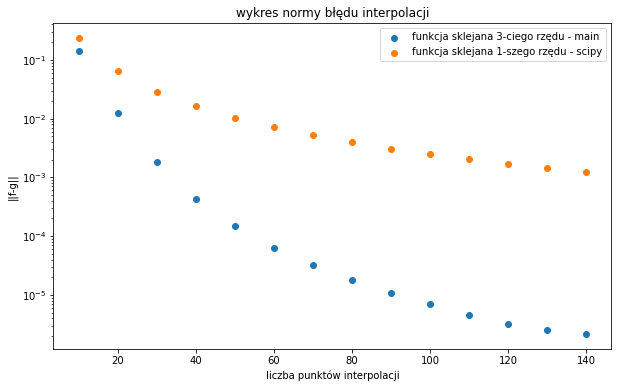

In [7]:
x = np.linspace(-1,1,1000)
n = np.arange(10,150,10)
f4 =lambda x: 1/(1+25*(x**2))
y = f4(x)
l_cubic_spl_main = np.zeros(len(n))
l_first_spl_scipy = np.zeros(len(n))
for i in n:
    xi = np.linspace(-1,1,i)
    yi=f4(xi)

    tck, u = splprep([xi , yi],s=0,k=1)
    t = np.linspace(u.min(),u.max(),1000)
    interpolated_f_splain = splev(t,tck,der = 0)

    b,c,d=main.cubic_spline(xi,yi)
    #
    f = [[d[i],c[i],b[i]] for i in range(len(b))]
    cubic_spline_inte = np.array([yi[0]])
    for j in range(len(xi)-1):
        x_new = x[np.logical_and(xi[j]<x, x<=xi[j+1])]
        y_new = yi[j]*np.ones(len(x_new))+f[j][2]*(x_new-xi[j])+f[j][1]*(x_new-xi[j])**2+f[j][0]*(x_new-xi[j])**3
        cubic_spline_inte = np.append(cubic_spline_inte,y_new)
    l_first_spl_scipy[np.where(n == i)] = bar.L_inf(f4(interpolated_f_splain[0]),interpolated_f_splain[1])
    l_cubic_spl_main[np.where(n == i)] = bar.L_inf(y,cubic_spline_inte)
plt.figure(figsize = [10,6])
plt.scatter(n,l_cubic_spl_main, label = "funkcja sklejana 3-ciego rzędu - main")
plt.scatter(n,l_first_spl_scipy, label = "funkcja sklejana 1-szego rzędu - scipy")
plt.title("wykres normy błędu interpolacji")
plt.yscale("log")
plt.legend()
plt.xlabel("liczba punktów interpolacji")
plt.ylabel("||f-g||")

    
    

***Zadanie 6.***  
Korzystając z funkcji z pakietu [scipy.interpolate.splprep](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.splprep.html#scipy.interpolate.splprep), funkcji zaimplementowanej w Zadaniu 4: 
    
### $ f(x) = cos(x)x^4$

W przedziale \[-1, 1\]

Dokonaj porównania wyników otrzymanych:  
Wykorzystując funkcję z ubiegłego tygodnia, ocenić jakość interpolacji funkcji spline pierwszego stopnia z wartościami danej funkcji.


Text(0.5, 1.0, 'interpolacja n = 6')

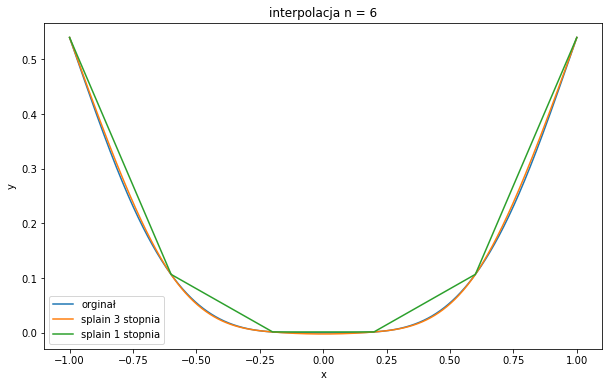

In [8]:
f4 =lambda x: np.cos(x)*x**4
x = np.linspace(-1,1,1000)
xi = np.linspace(-1,1,6)
yi=f4(xi)

a,b=main.first_spline(xi,yi)
f = [[b[i],a[i]] for i in range(len(a))]
interpolated_f_splain = np.array([yi[0]])
for j in range(len(xi)-1):
    x_new = x[np.logical_and(xi[j]<x, x<=xi[j+1])]
    interpolated_f_splain = np.append(interpolated_f_splain,PolyCoefficients(x_new, f[j]))

b,c,d=main.cubic_spline(xi,yi)
    #
f = [[d[i],c[i],b[i]] for i in range(len(b))]
cubic_spline_inte = np.array([yi[0]])
for j in range(len(xi)-1):
    x_new = x[np.logical_and(xi[j]<x, x<=xi[j+1])]
    y_new = yi[j]*np.ones(len(x_new))+f[j][2]*(x_new-xi[j])+f[j][1]*(x_new-xi[j])**2+f[j][0]*(x_new-xi[j])**3
    cubic_spline_inte = np.append(cubic_spline_inte,y_new)
plt.figure(figsize= [10,6])
plt.plot(x,f4(x), label = "orginał")
plt.plot(x,cubic_spline_inte, label = "splain 3 stopnia")
plt.plot(x,interpolated_f_splain, label = "splain 1 stopnia")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("interpolacja n = 6")

Text(0, 0.5, '||f-g||')

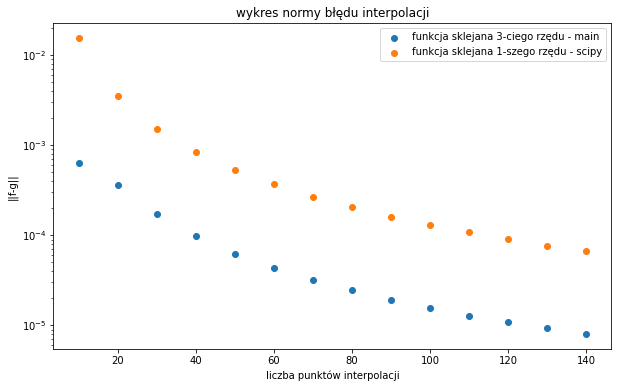

In [9]:
x = np.linspace(-1,1,1000)
n = np.arange(10,150,10)
f4 =lambda x: np.cos(x)*x**4
y = f4(x)
l_cubic_spl_main = np.zeros(len(n))
l_first_spl_scipy = np.zeros(len(n))
for i in n:
    xi = np.linspace(-1,1,i)
    yi=f4(xi)

    tck, u = splprep([xi , yi],s=0,k=1)
    t = np.linspace(u.min(),u.max(),1000)
    interpolated_f_splain = splev(t,tck,der = 0)

    b,c,d=main.cubic_spline(xi,yi)
    #
    f = [[d[i],c[i],b[i]] for i in range(len(b))]
    cubic_spline_inte = np.array([yi[0]])
    for j in range(len(xi)-1):
        x_new = x[np.logical_and(xi[j]<x, x<=xi[j+1])]
        y_new = yi[j]*np.ones(len(x_new))+f[j][2]*(x_new-xi[j])+f[j][1]*(x_new-xi[j])**2+f[j][0]*(x_new-xi[j])**3
        cubic_spline_inte = np.append(cubic_spline_inte,y_new)
    l_first_spl_scipy[np.where(n == i)] = bar.L_inf(f4(interpolated_f_splain[0]),interpolated_f_splain[1])
    l_cubic_spl_main[np.where(n == i)] = bar.L_inf(y,cubic_spline_inte)
plt.figure(figsize = [10,6])
plt.scatter(n,l_cubic_spl_main, label = "funkcja sklejana 3-ciego rzędu - main")
plt.scatter(n,l_first_spl_scipy, label = "funkcja sklejana 1-szego rzędu - scipy")
plt.title("wykres normy błędu interpolacji")
plt.yscale("log")
plt.legend()
plt.xlabel("liczba punktów interpolacji")
plt.ylabel("||f-g||")

***Zadanie 7.***  
Dla funkcji:
### $f(x) = |sin(5x)|^3$

Porównać działanie funkcji zaimplementowanych w Zadaniu 1 oraz 4 oraz przedstawić wyniki na odpowiednich wykresach.

Text(0.5, 1.0, 'interpolacja n = 10')

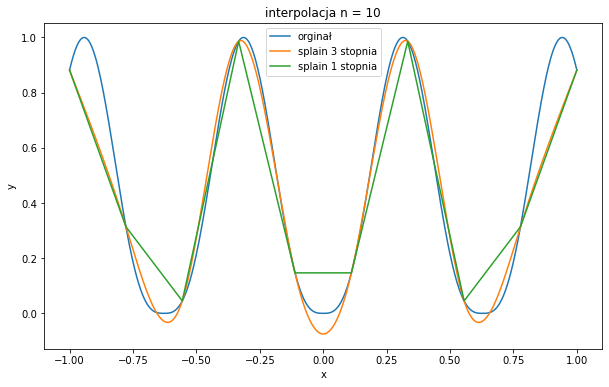

In [10]:
f4 =lambda x: abs(np.sin(5*x))**3
x = np.linspace(-1,1,1000)
xi = np.linspace(-1,1,10)
yi=f4(xi)

a,b=main.first_spline(xi,yi)
f = [[b[i],a[i]] for i in range(len(a))]
interpolated_f_splain = np.array([yi[0]])
for j in range(len(xi)-1):
    x_new = x[np.logical_and(xi[j]<x, x<=xi[j+1])]
    interpolated_f_splain = np.append(interpolated_f_splain,PolyCoefficients(x_new, f[j]))

b,c,d=main.cubic_spline(xi,yi)
    #
f = [[d[i],c[i],b[i]] for i in range(len(b))]
cubic_spline_inte = np.array([yi[0]])
for j in range(len(xi)-1):
    x_new = x[np.logical_and(xi[j]<x, x<=xi[j+1])]
    y_new = yi[j]*np.ones(len(x_new))+f[j][2]*(x_new-xi[j])+f[j][1]*(x_new-xi[j])**2+f[j][0]*(x_new-xi[j])**3
    cubic_spline_inte = np.append(cubic_spline_inte,y_new)
plt.figure(figsize= [10,6])
plt.plot(x,f4(x), label = "orginał")
plt.plot(x,cubic_spline_inte, label = "splain 3 stopnia")
plt.plot(x,interpolated_f_splain, label = "splain 1 stopnia")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("interpolacja n = 10")


Text(0, 0.5, '||f-g||')

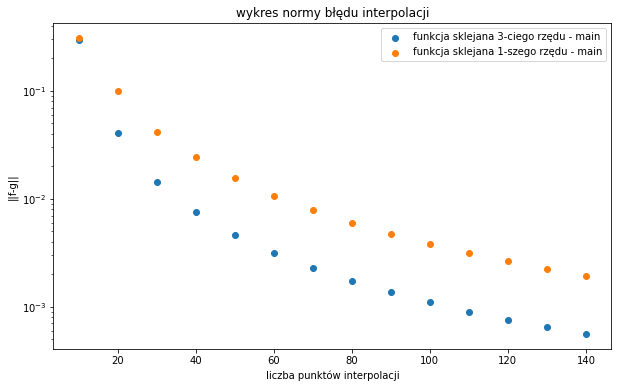

In [11]:
x = np.linspace(-1,1,1000)
n = np.arange(10,150,10)
f4 =lambda x: abs(np.sin(5*x))**3
y = f4(x)
l_cubic_spl_main = np.zeros(len(n))
l_first_spl_scipy = np.zeros(len(n))
for i in n:
    xi = np.linspace(-1,1,i)
    yi=f4(xi)

    a,b=main.first_spline(xi,yi)
    f = [[b[i],a[i]] for i in range(len(a))]
    interpolated_f_splain = np.array([yi[0]])
    for j in range(len(xi)-1):
        x_new = x[np.logical_and(xi[j]<x, x<=xi[j+1])]
        interpolated_f_splain = np.append(interpolated_f_splain,PolyCoefficients(x_new, f[j]))

    b,c,d=main.cubic_spline(xi,yi)
    #

    f = [[d[i],c[i],b[i]] for i in range(len(b))]
    cubic_spline_inte = np.array([yi[0]])
    for j in range(len(xi)-1):
        x_new = x[np.logical_and(xi[j]<x, x<=xi[j+1])]
        y_new = yi[j]*np.ones(len(x_new))+f[j][2]*(x_new-xi[j])+f[j][1]*(x_new-xi[j])**2+f[j][0]*(x_new-xi[j])**3
        cubic_spline_inte = np.append(cubic_spline_inte,y_new)
    
    l_first_spl_scipy[np.where(n == i)] = bar.L_inf(y,interpolated_f_splain)
    l_cubic_spl_main[np.where(n == i)] = bar.L_inf(y,cubic_spline_inte)
plt.figure(figsize = [10,6])
plt.scatter(n,l_cubic_spl_main, label = "funkcja sklejana 3-ciego rzędu - main")
plt.scatter(n,l_first_spl_scipy, label = "funkcja sklejana 1-szego rzędu - main")
plt.title("wykres normy błędu interpolacji")
plt.yscale("log")
plt.legend()
plt.xlabel("liczba punktów interpolacji")
plt.ylabel("||f-g||")

## Wnioski

interpolacja funkcjami sklejonymi jest przydatnym narzędziem do interpolacji funkcji w węzłach równoodległych. zapobiega ona powstaniu efektu rungego przez co zmniejsza się wielkość błędu względem normy L_inf. w zadaniu 2 oraz 3 można było zaobserwować błąd wynikający z interpolacji wielomianem i funkcją sklejaną dla węzłów równoodległych. z wykresu błędu można odczytać że wraz ze zwiększaniem ilości węzłów równoodległych błąd interpolacji barycentrycznej rósł wykładniczo poza jednym wyjątkiem. Funkcja $ f(x) = cos(x)x^4$ jest bardzo regularna więc wielomian rzędu 20 dobrze ją interpoluje(dla punktów równoodległych) dla większej ilości węzłów norma błędu rośnie wykładniczo(efekt rungego). 

Jednym z problemów napotkanych podczas wykonywania zadań była niemożność interpolowania funkcji w wybranych punktach za pomocą scipy.interpolate.splprep (przynajmniej nie znalazłem takiego sposobu w dokumentacji lub na stack overflow). był to duży problem z uwagi na niemożność porównywania interpolacji w konkretnych punktach.

z powyrzszych zadań można wywnioskować że funkcje regularne(np. $ f(x) = cos(x)x^4$ ) na przedziale[-1,1] są bardzo dobrze interpolowane przez funkcję sklejaną 3 rzędu nawet przy małej ilości węzłów. jeżeli chodzi o funkcje o małej regularności(np. $f(x) = |sin(5x)|^3$ ) przy małej liczbie węzłów posiadają podobną normę błędu dla interpolacji funkcją sklejaną stopnia 1 jak i 3 lecz norma błędu jest widocznie mniejsza dla interpolacji funkcją sklejaną stopnia 3-ciego dla dowolnej liczby węzłów.

interpolacja funkcją sklejaną stopnia 3 jest dużo bardziej dokładniejsza ale co za tym idzie wymaga dużo większego nakładu czasu w porównaniu do funkcji sklejanej stopnia 1.

podczas labolatoriów nie było problemów z implementacjami funkcji. Poza pewnymi problemami spowodowanymi używaniem funkcji scipy.interpolate.splprep() labolatoria mineły bezproblemowo. Myślę że wiedza o interpolacji zdobyta na labolatoriach będzie przydatna w przyszłości.